<a href="https://colab.research.google.com/github/guteng083/Haepe-Recommendation-System/blob/main/haepe_recommendation_system.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Library

In [76]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
import pathlib

# Load Data

In [77]:
data = pd.read_csv('cemara_dataset.csv')
data

,Timestamp,Peran,Umur,Minat,Minat1,Minat2,Keahlian,Keahlian1,Aktivitas
0,21/05/2022 12:39:46,Anak,21-55,Alam,Hiburan,Animasi,Masak,Manajemen,Membersihkan Rumah
1,21/05/2022 12:44:19,Ayah,21-55,Makanan,Olahraga,Binatang,Swakarya/DIY,Berkebun,Membersihkan Rumah
2,21/05/2022 12:46:16,Anak,15<,Makanan,Animasi,Binatang,Swakarya/DIY,Sosialisasi,Belanja Kebutuhan
3,21/05/2022 12:49:24,Ibu,21-55,Makanan,Olahraga,Hiburan,Masak,Sosialisasi,Memasak
4,21/05/2022 13:03:39,Anak,15-20,Makanan,Hiburan,Keuangan,Masak,NaN,Membersihkan Rumah
...,...,...,...,...,...,...,...,...,...
282,25/05/2022 7:31:20,Anak,15<,Olahraga,Alam,Binatang,Berkebun,NaN,Mencuci Piring
283,25/05/2022 19:23:51,Anak,21-55,Makanan,Hiburan,Edukasi,Sosialisasi,NaN,Membersihkan Rumah
284,25/05/2022 19:28:45,Ibu,21-55,Makanan,Hiburan,Keuangan,Masak,Berkebun,Memasak
285,25/05/2022 19:29:51,Ayah,21-55,Teknologi,Hiburan,Edukasi,Otomotif,Kelistrikan,Memperbaiki Rumah/Kelistrikan/Perabotan


# Preprocessing Data

In [78]:
data = data.drop(['Timestamp'], axis=1)

In [79]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287 entries, 0 to 286
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Peran      287 non-null    object
 1   Umur       287 non-null    object
 2   Minat      287 non-null    object
 3   Minat1     287 non-null    object
 4   Minat2     287 non-null    object
 5   Keahlian   287 non-null    object
 6   Keahlian1  222 non-null    object
 7   Aktivitas  287 non-null    object
dtypes: object(8)
memory usage: 18.1+ KB


In [80]:
data.isnull().sum()

Peran         0
Umur          0
Minat         0
Minat1        0
Minat2        0
Keahlian      0
Keahlian1    65
Aktivitas     0
dtype: int64

In [98]:
#Ganti data yang hilang dengan data yang paling sering
data = data.fillna(data.mode().iloc[0])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287 entries, 0 to 286
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Peran      287 non-null    object
 1   Umur       287 non-null    object
 2   Minat      287 non-null    object
 3   Minat1     287 non-null    object
 4   Minat2     287 non-null    object
 5   Keahlian   287 non-null    object
 6   Keahlian1  287 non-null    object
 7   Aktivitas  287 non-null    object
dtypes: object(8)
memory usage: 18.1+ KB


In [82]:
data.isnull().sum()

Peran        0
Umur         0
Minat        0
Minat1       0
Minat2       0
Keahlian     0
Keahlian1    0
Aktivitas    0
dtype: int64

# Exploratory Data Analysis

In [83]:
data.nunique()

Peran        3
Umur         4
Minat        8
Minat1       9
Minat2       9
Keahlian     7
Keahlian1    6
Aktivitas    8
dtype: int64

Anak    105
Ibu      98
Ayah     84
Name: Peran, dtype: int64


<AxesSubplot:>

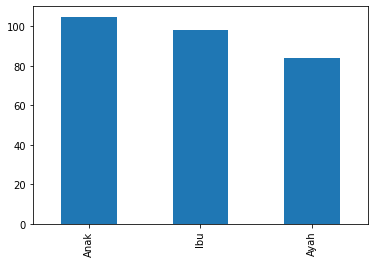

In [84]:
cat_value = data['Peran'].value_counts()
print(cat_value)
cat_value.plot(kind='bar')

21-55    184
15-20     48
>55       29
15<       26
Name: Umur, dtype: int64


<AxesSubplot:>

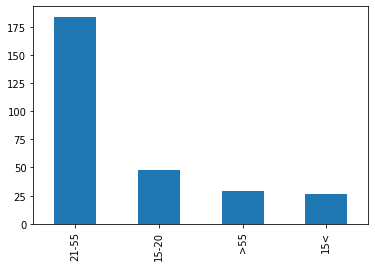

In [85]:
cat_value = data['Umur'].value_counts()
print(cat_value)
cat_value.plot(kind='bar')

Makanan      149
Olahraga      59
Alam          28
Hiburan       23
Teknologi     20
Edukasi        6
Keuangan       1
Binatang       1
Name: Minat, dtype: int64


<AxesSubplot:>

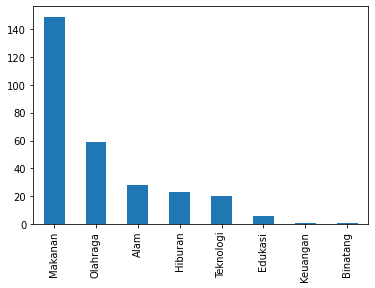

In [86]:
cat_value = data['Minat'].value_counts()
print(cat_value)
cat_value.plot(kind='bar')

Hiburan      96
Alam         41
Edukasi      40
Olahraga     36
Keuangan     29
Teknologi    29
Animasi       6
Binatang      6
Literatur     4
Name: Minat1, dtype: int64


<AxesSubplot:>

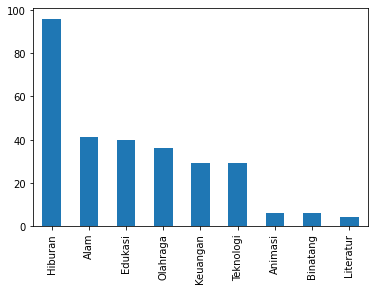

In [87]:
cat_value = data['Minat1'].value_counts()
print(cat_value)
cat_value.plot(kind='bar')

Kesehatan    85
Keuangan     55
Hiburan      43
Edukasi      27
Binatang     25
Animasi      23
Teknologi    13
Literatur    13
Alam          3
Name: Minat2, dtype: int64


<AxesSubplot:>

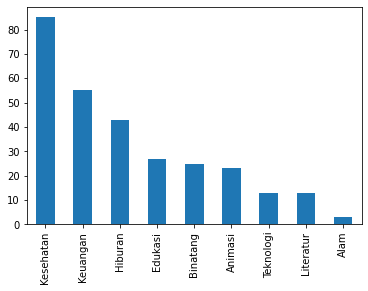

In [88]:
cat_value = data['Minat2'].value_counts()
print(cat_value)
cat_value.plot(kind='bar')

Masak           142
Sosialisasi      43
Swakarya/DIY     39
Otomotif         21
Manajemen        19
Berkebun         15
Kelistrikan       8
Name: Keahlian, dtype: int64


<AxesSubplot:>

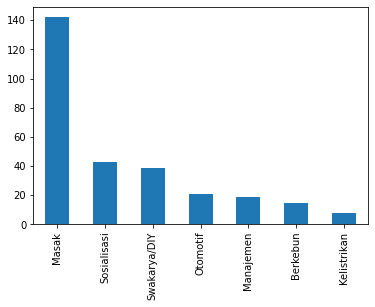

In [89]:
cat_value = data['Keahlian'].value_counts()
print(cat_value)
cat_value.plot(kind='bar')

Berkebun        124
Manajemen        52
Sosialisasi      47
Swakarya/DIY     26
Otomotif         20
Kelistrikan      18
Name: Keahlian1, dtype: int64


<AxesSubplot:>

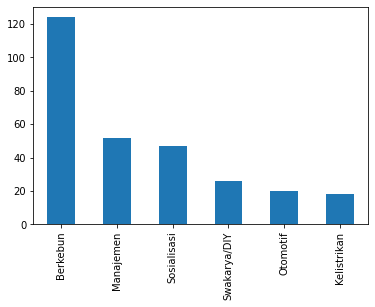

In [90]:
cat_value = data['Keahlian1'].value_counts()
print(cat_value)
cat_value.plot(kind='bar')

In [91]:
x = data.drop(['Aktivitas'], axis=1)
y = data['Aktivitas']

le = LabelEncoder()
x = pd.get_dummies(x)
y = le.fit_transform(y)



In [92]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Create Model

In [93]:
# input = keras.Input(shape=(46,))
# dense1 = keras.layers.Dense(46, activation='relu')(input)
# dense2 = keras.layers.Dense(100, activation='relu')(dense1)
# dense3 = keras.layers.Dense(100, activation='relu')(dense2)
# dense4 = keras.layers.Dense(200, activation='relu')(dense3)
# output = keras.layers.Dense(1)(dense4)

# model = keras.Model(inputs=input, outputs=output)
# model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

In [96]:
model = keras.Sequential()
model.add(keras.layers.Dense(13, input_dim=13, kernel_initializer='normal', activation='relu'))
model.add(keras.layers.Dense(1, kernel_initializer='normal'))
# Compile model
model.compile(loss='mae', optimizer='adam', metrics=['mae'])
model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=50, batch_size=64, validation_split=0.2)

Epoch 1/50


TypeError: in user code:

    File "c:\laragon\bin\python\python-3.10.4\lib\site-packages\keras\engine\training.py", line 1051, in train_function  *
        return step_function(self, iterator)
    File "c:\laragon\bin\python\python-3.10.4\lib\site-packages\keras\engine\training.py", line 1040, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\laragon\bin\python\python-3.10.4\lib\site-packages\keras\engine\training.py", line 1030, in run_step  **
        outputs = model.train_step(data)
    File "c:\laragon\bin\python\python-3.10.4\lib\site-packages\keras\engine\training.py", line 890, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "c:\laragon\bin\python\python-3.10.4\lib\site-packages\keras\engine\training.py", line 948, in compute_loss
        return self.compiled_loss(
    File "c:\laragon\bin\python\python-3.10.4\lib\site-packages\keras\engine\compile_utils.py", line 201, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "c:\laragon\bin\python\python-3.10.4\lib\site-packages\keras\losses.py", line 139, in __call__
        losses = call_fn(y_true, y_pred)
    File "c:\laragon\bin\python\python-3.10.4\lib\site-packages\keras\losses.py", line 243, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "c:\laragon\bin\python\python-3.10.4\lib\site-packages\keras\losses.py", line 1455, in mean_absolute_error
        return backend.mean(tf.abs(y_pred - y_true), axis=-1)

    TypeError: Value passed to parameter 'x' has DataType uint8 not in list of allowed values: bfloat16, float16, float32, float64, int8, int16, int32, int64


In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 46)]              0         
                                                                 
 dense (Dense)               (None, 46)                2162      
                                                                 
 dense_1 (Dense)             (None, 100)               4700      
                                                                 
 dense_2 (Dense)             (None, 100)               10100     
                                                                 
 dense_3 (Dense)             (None, 200)               20200     
                                                                 
 dense_4 (Dense)             (None, 1)                 201       
                                                                 
Total params: 37,363
Trainable params: 37,363
Non-trainable p

# Train Model

In [ ]:
history = model.fit(x_train, y_train, epochs=50, verbose=1)

Epoch 1/50
9/9 [==============================] - 0s 3ms/step - loss: 0.5642 - accuracy: 0.2829
Epoch 2/50
9/9 [==============================] - 0s 5ms/step - loss: 0.5391 - accuracy: 0.2752
Epoch 3/50
9/9 [==============================] - 0s 4ms/step - loss: 0.7748 - accuracy: 0.2403
Epoch 4/50
9/9 [==============================] - 0s 4ms/step - loss: 0.9020 - accuracy: 0.2519
Epoch 5/50
9/9 [==============================] - 0s 4ms/step - loss: 0.7149 - accuracy: 0.2519
Epoch 6/50
9/9 [==============================] - 0s 4ms/step - loss: 0.7793 - accuracy: 0.2713
Epoch 7/50
9/9 [==============================] - 0s 5ms/step - loss: 0.7341 - accuracy: 0.2636
Epoch 8/50
9/9 [==============================] - 0s 5ms/step - loss: 0.5608 - accuracy: 0.2636
Epoch 9/50
9/9 [==============================] - 0s 4ms/step - loss: 0.5534 - accuracy: 0.2752
Epoch 10/50
9/9 [==============================] - 0s 5ms/step - loss: 0.4984 - accuracy: 0.2829
Epoch 11/50
9/9 [======================

# Evaluate Model

Text(0, 0.5, 'Training Error')

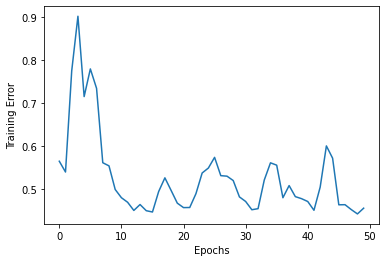

In [ ]:
plt.plot(history.history['loss'])
plt.xlabel("Epochs")
plt.ylabel("Training Error")

In [ ]:
model.evaluate(x_test, y_test)

1/1 [==============================] - 0s 57ms/step - loss: 4.6072 - accuracy: 0.2414


[4.607223987579346, 0.24137930572032928]

# Model Save

In [ ]:
model.save('haepe.h5')

# TF Lite Convert

In [ ]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

tflite_file = pathlib.Path('haepe.tflite')
tflite_file.write_bytes(tflite_model)

INFO:tensorflow:Assets written to: C:\Users\RIZKIP~1\AppData\Local\Temp\tmpvlhvgpdt\assets


INFO:tensorflow:Assets written to: C:\Users\RIZKIP~1\AppData\Local\Temp\tmpvlhvgpdt\assets


151952